In [38]:
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

os.chdir('D:/repo/AlgoUtil') # Use your own path
from get_data.static import RESTfulProcessor

In [159]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [21]:
resp = RESTfulProcessor(verbose=False)
df_train, df_test = resp.process_data()

2021-10-31 09:40:37,193 INFO: Found stored D:\repo\AlgoUtil/data/ticker.pkl data, start loading
2021-10-31 09:40:37,195 INFO: Loading is done
2021-10-31 09:40:37,197 INFO: Found stored D:\repo\AlgoUtil/data/ticker_detail.pkl data, start loading
2021-10-31 09:40:37,234 INFO: Loading is done
2021-10-31 09:40:37,234 INFO: Found stored D:\repo\AlgoUtil/data/ticker_price.pkl data, start loading
2021-10-31 09:40:37,452 INFO: Loading is done


# Missing Data

<AxesSubplot:xlabel='missing_rate', ylabel='column_name'>

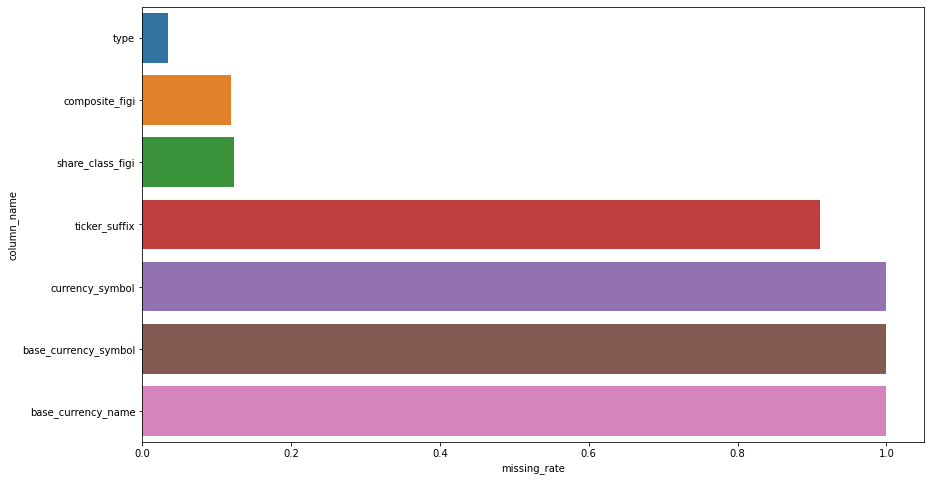

In [50]:
df_missing = df_train.isnull().sum() / df_train.shape[0]
df_missing = df_missing.reset_index()
df_missing.columns = ['column_name', 'missing_rate']
df_missing = df_missing[df_missing['missing_rate'] > 0.01]
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x="missing_rate", y="column_name", data=df_missing)


# Add Previous Observation

In [173]:
prev_columns = ['after_hours', 'pre_market', 'volume', 'open'] # add close
df_train.sort_values(by=['ticker', 'date'], inplace=True)
last_prefix = 'last_'
chg_suffix = '_chg'
pct_chg_suffix = '_pct_chg'

for c in prev_columns: 
    df_train[last_prefix + c] = df_train.groupby(['ticker'])[c].shift(1)
    df_train[c + chg_suffix] = df_train[c] - df_train[last_prefix + c]
    df_train[c + pct_chg_suffix] = (df_train[c] / df_train[last_prefix + c] - 1) * 100

shown_columns = ['ticker', 'date'] + prev_columns + [last_prefix + c for c in prev_columns] + [c + chg_suffix for c in prev_columns] + [c + pct_chg_suffix for c in prev_columns]
df_train.loc[df_train['ticker'] == 'AAPL', shown_columns]

,ticker,date,after_hours,pre_market,volume,open,last_after_hours,last_pre_market,last_volume,last_open,after_hours_chg,pre_market_chg,volume_chg,open_chg,after_hours_pct_chg,pre_market_pct_chg,volume_pct_chg,open_pct_chg
982766,AAPL,2020-06-01,80.1875,79.7500,81000752.0,79.4375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
982767,AAPL,2020-06-02,80.8375,80.6225,87642632.0,80.1863,80.1875,79.7500,81000752.0,79.4375,0.6500,0.8725,6641880.0,0.7488,0.810600,1.094044,8.199776,0.942628
982768,AAPL,2020-06-03,81.3000,81.1250,104490584.0,81.1650,80.8375,80.6225,87642632.0,80.1863,0.4625,0.5025,16847952.0,0.9787,0.572135,0.623275,19.223466,1.220533
982769,AAPL,2020-06-04,80.5250,81.2025,87560364.0,81.0975,81.3000,81.1250,104490584.0,81.1650,-0.7750,0.0775,-16930220.0,-0.0675,-0.953260,0.095532,-16.202627,-0.083164
982770,AAPL,2020-06-05,82.7225,81.0725,137248048.0,80.8375,80.5250,81.2025,87560364.0,81.0975,2.1975,-0.1300,49687684.0,-0.2600,2.728966,-0.160094,56.746776,-0.320602
982771,AAPL,2020-06-08,83.2000,82.7500,95650900.0,82.5625,82.7225,81.0725,137248048.0,80.8375,0.4775,1.6775,-41597148.0,1.7250,0.577231,2.069136,-30.308007,2.133911
982772,AAPL,2020-06-09,86.3500,82.9000,147712228.0,83.0350,83.2000,82.7500,95650900.0,82.5625,3.1500,0.1500,52061328.0,0.4725,3.786058,0.181269,54.428477,0.572294
982773,AAPL,2020-06-10,87.7500,86.5050,166646980.0,86.9750,86.3500,82.9000,147712228.0,83.0350,1.4000,3.6050,18934752.0,3.9400,1.621309,4.348613,12.818676,4.744987
982774,AAPL,2020-06-11,85.1825,87.2350,201659684.0,87.3275,87.7500,86.5050,166646980.0,86.9750,-2.5675,0.7300,35012704.0,0.3525,-2.925926,0.843882,21.010104,0.405289
982775,AAPL,2020-06-12,84.6000,85.2500,200145124.0,86.1800,85.1825,87.2350,201659684.0,87.3275,-0.5825,-1.9850,-1514560.0,-1.1475,-0.683826,-2.275463,-0.751047,-1.314019


In [174]:
sample_ticker = ['AAPL', 'MSFT', 'AMZN', 'FB', 'GOOG', 'TSLA', 'NVDA']
df_sample_train = df_train[df_train['ticker'].isin(sample_ticker)]

# Correlation Plots Using seaborn - Relation between Volume Change vs Price Change

In [175]:
df_sample_train.columns

Index(['ticker', 'date', 'after_hours', 'high', 'low', 'open', 'pre_market', 'volume', 'name', 'market', 'locale', 'primary_exchange', 'type', 'active', 'currency_name', 'cik', 'composite_figi', 'share_class_figi', 'last_updated_utc', 'outstanding_shares', 'market_cap', 'phone_number', 'address', 'sic_code', 'sic_description', 'ticker_root', 'ticker_suffix', 'currency_symbol', 'base_currency_symbol', 'base_currency_name', 'last_after_hours', 'after_hours_chg', 'last_volume', 'volume_chg', 'after_hours_pct_chg', 'volume_pct_chg', 'last_open', 'open_chg', 'open_pct_chg', 'last_pre_market', 'pre_market_chg', 'pre_market_pct_chg'], dtype='object')

Text(0.5, 1.05, 'Price Correlation by Ticker')

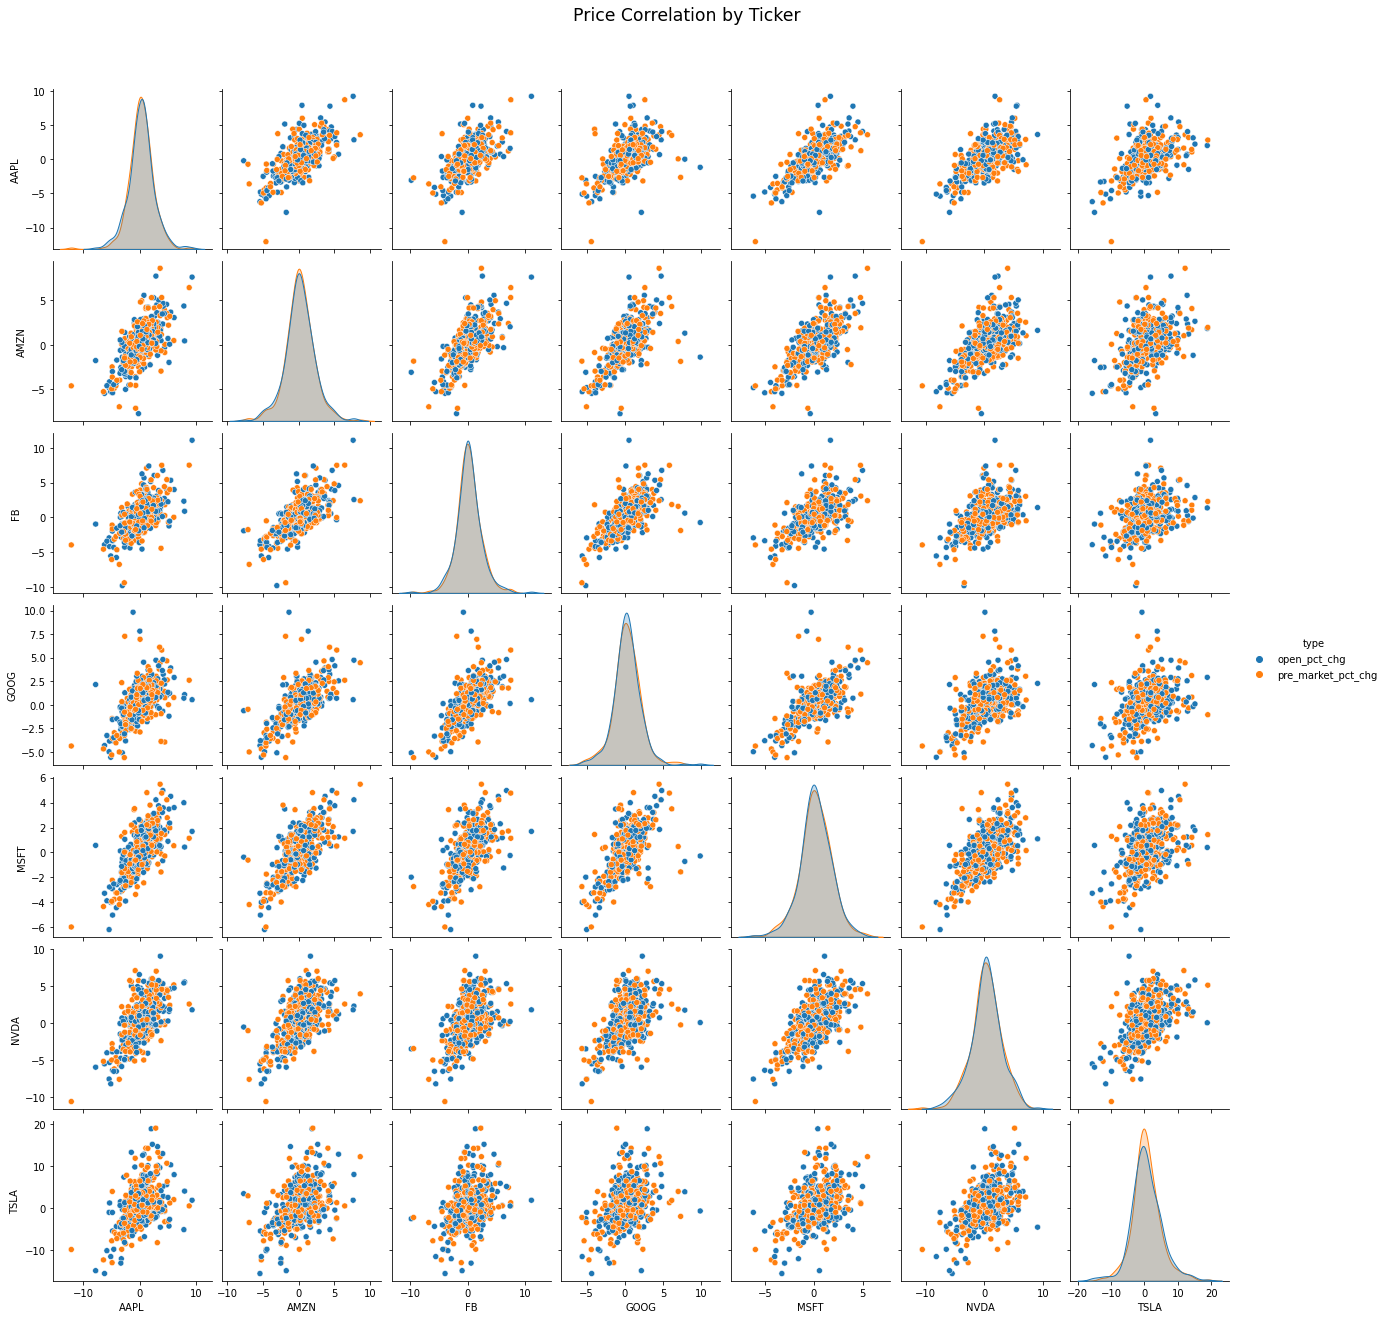

In [184]:
hue_columns = ['pre_market_pct_chg', 'open_pct_chg']
type_column = 'ticker'

df_melt = df_sample_train.melt(
    id_vars=['date', 'ticker', 'sic_code', 'sic_description'], 
    value_vars=hue_columns, 
    var_name='type', 
    value_name='value'
)

df_pivot = pd.pivot_table(
    data=df_melt, 
    index=['date', 'type'], 
    columns='ticker', 
    values='value'
).reset_index(drop=False)

# df_pivot.columns = ['_'.join(x).lower() if x[1] != '' else x[0] for x in df_pivot.columns if len(x) == 2]

g1 = sns.pairplot(data=df_pivot, hue='type')
g1.fig.suptitle("Price Correlation by Ticker", y=1.03, fontsize='xx-large')

Text(0.5, 1.03, 'Volume vs Price Correlation by Ticker')

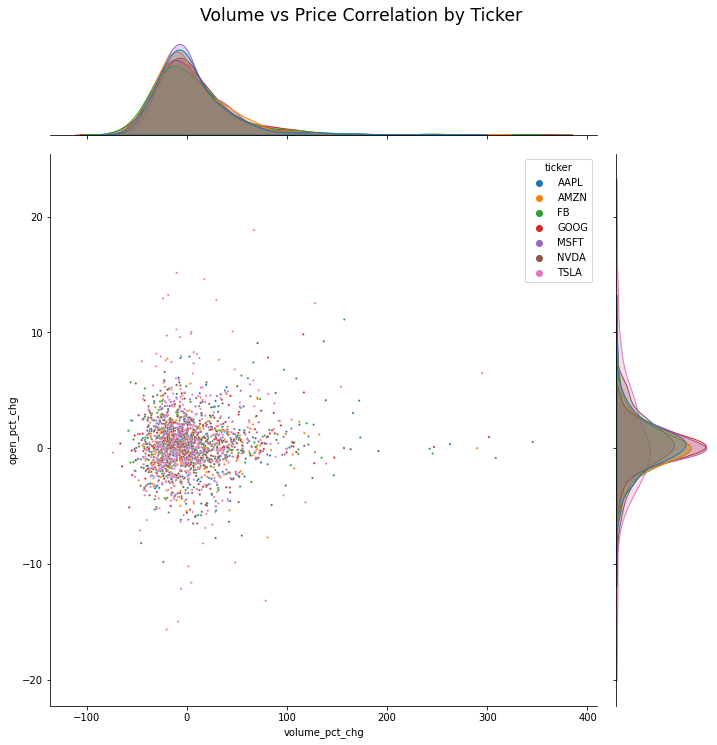

In [186]:
g2 = sns.jointplot(data=df_sample_train, x="volume_pct_chg", y="open_pct_chg", hue="ticker", s=5, height=10)
g2.fig.suptitle("Volume vs Price Correlation by Ticker", y=1.03, fontsize='xx-large')

Text(0.5, 1.03, 'Price Move over Time by Ticker')

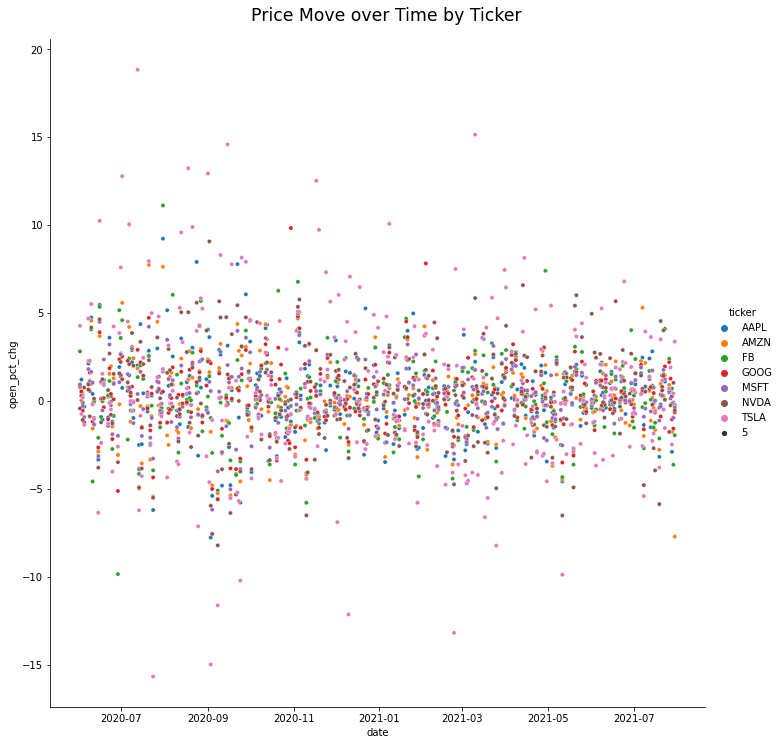

In [187]:
g3 = sns.relplot(data=df_sample_train, x='date', y='open_pct_chg', hue='ticker', height=10, size=5)
g3.fig.suptitle("Price Movement over Time by Ticker", y=1.03, fontsize='xx-large')